<a href="https://colab.research.google.com/github/yweslakarep123/resume_dataset/blob/main/resume_screening_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [7]:
!chmod 600 /content/kaggle.json

In [8]:
!kaggle datasets download -d gauravduttakiit/resume-dataset

resume-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 2.8 MB/s eta 0:00:00


In [10]:
from pyunpack import Archive
zip_file_path = '/content/resume-dataset.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")


Ekstraksi selesai.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/UpdatedResumeDataSet.csv')

In [13]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [15]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [16]:
df.shape

(962, 2)

In [17]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

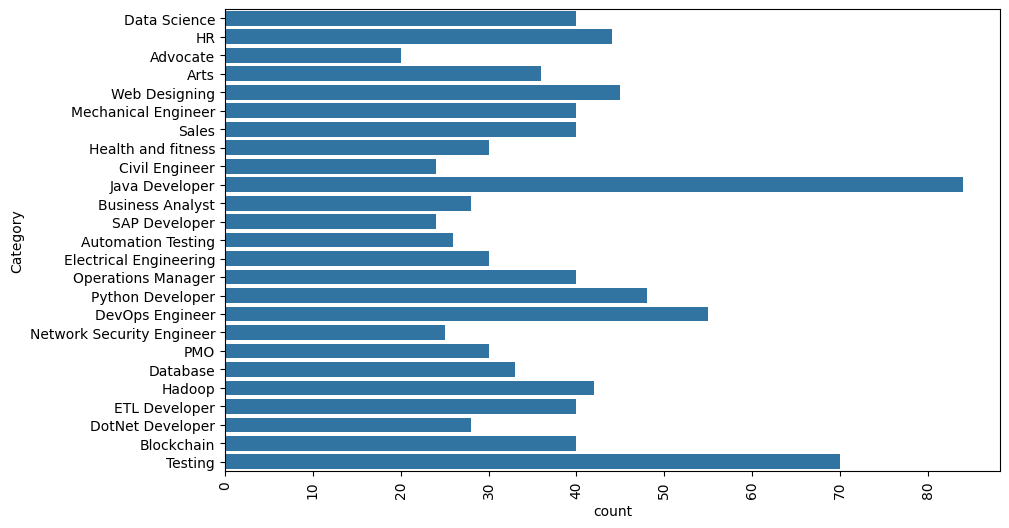

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [20]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
counts = df['Category'].value_counts()
label = df['Category'].unique()

plt.figure(figsize=(20,12))
plt.pie(counts,labels=label,autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.show()

In [31]:
import re


def cleanResume(txt):
  cleantxt = re.sub('http\S+\s',' ',txt)
  cleantxt = re.sub('RT|cc',' ',cleantxt)
  cleantxt = re.sub('@\S',' ',cleantxt)
  cleantxt = re.sub('#\S',' ',cleantxt)
  cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ """),' ',cleantxt)
  cleantxt = re.sub(r'[^\x00-\x7f]',' ',cleantxt)
  cleantxt = re.sub('\s+',' ',cleantxt)

  return cleantxt

In [33]:
resume_text = """
Check out my latest blog post at http://example.com! RT if you find it interesting.
#DataScience #MachineLearning @JohnDoe
"""
cleaned_resume = cleanResume(resume_text)
cleaned_resume

' Check out my latest blog post at if you find it interesting ataScience achineLearning ohnDoe '

In [34]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [37]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [38]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [40]:
encoder.fit(df['Category'])
df['Category'] = encoder.transform(df['Category'])

In [43]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer(stop_words='english')

In [47]:
Vectorizer.fit(df['Resume'])
updated_res = Vectorizer.transform(df['Resume'])

In [48]:
updated_res

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164265 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(updated_res,df['Category'],test_size=0.2,random_state=101)

In [52]:
x_train.shape

(769, 7351)

In [53]:
x_test.shape

(193, 7351)

In [58]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [59]:
y_pred = clf.fit(x_train, y_train).predict(x_test)
print(y_pred)

[ 1 18  6  6  7  4 23 10  7 20 19 11 23 23 18 14  1 17  3  6 11 17 15 21
 18 13 24 15 17 15 13 24 24 10 22  2 15  3  2 23 18 23  4 15 15 19  4 10
  3  1 18 13 18  2 12 23 22  3  8 22  2 10 18  3 23  6  8 16 14  9  4  6
 22  0  3  1  5  1 20 19 23  7 17  1 24  9  0 13 18 23 15 10  6 20  1 13
 13 24  4 15 15 23 17 21  8 12 16  1  1 15  3 17  8  6 19  9 13 24 18  8
 18 10  0  1 16 13 12  3 16 16  5  9 22  4 20 15  1 15 19  6  7  4 22 16
 15 14  7 16 22 24  1 24 21 22 15 12 16  2 13 17 11 24 11 15  8 20 15  6
 23 10 23 10  4 19 21 21 20 16 10 23  6 24 13 19 10 23 18 24 22 24  6 15
 10]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [61]:
import pickle

folder_path = '/content/drive/MyDrive/Test_model'
filename = folder_path+'hasil_modelNLP_resume_dataset.pkl'

with open(filename, 'wb') as file:
    pickle.dump(clf, file)